# DAT210x - Programming with Python for DS

## Module4- Lab5

In [131]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [132]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [133]:
samples = []

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [134]:
for i in range(0,72):
    num = 5*i
    filename = 'Datasets/ALOI/32/32_r'+str(num)+'.png'
    img = misc.imread(filename)
    img = img.flatten()
    samples.append(img)
    

Convert `samples` to a DataFrame named `df`:

In [135]:
df = pd.DataFrame(samples)
print(df.shape)

(72, 27648)


Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [136]:
from sklearn import manifold
import math, random
iso = manifold.Isomap(n_neighbors=2, n_components=3)
iso.fit(df)
S = iso.transform(df)
num_images, num_pixels = df.shape
num_pixels = math.sqrt(num_pixels)


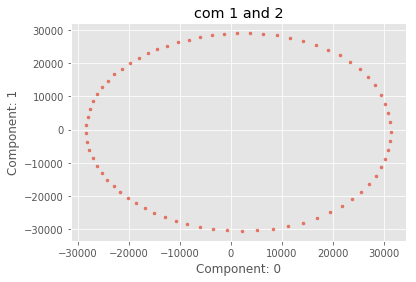

In [137]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
#    for i in range(num_to_plot):
#        img_num = int(random.random() * num_images)
#        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
#        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
#        img = df.iloc[img_num,:].reshape(144, 192)
#        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)
    
Plot2D(S, 'com 1 and 2', x=0, y=1, num_to_plot=40)
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

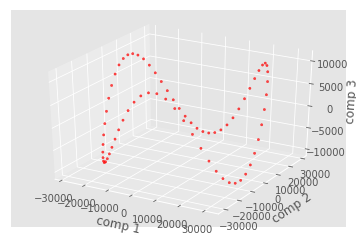

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')

ax.scatter(S[:,0],S[:,1],S[:,2], marker='.',alpha=0.7, c='r')
plt.show()


Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [139]:
samples = []
colors = []

Convert `samples` to a DataFrame named `df`:

In [140]:
for i in range(0,12):
    num = 10*i + 110
    filename = 'Datasets/ALOI/32i/32_i'+str(num)+'.png'
    img = misc.imread(filename)
    img = img.flatten()
    samples.append(img)
    colors.append('b')
    
for i in range(0,72):
    num = 5*i
    filename = 'Datasets/ALOI/32/32_r'+str(num)+'.png'
    img = misc.imread(filename)
    img = img.flatten()
    samples.append(img)
    colors.append('r')

df = pd.DataFrame(samples)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [141]:
from sklearn import manifold
import math, random
iso = manifold.Isomap(n_neighbors=6, n_components=3)
iso.fit(df)
S = iso.transform(df)
num_images, num_pixels = df.shape
num_pixels = math.sqrt(num_pixels)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

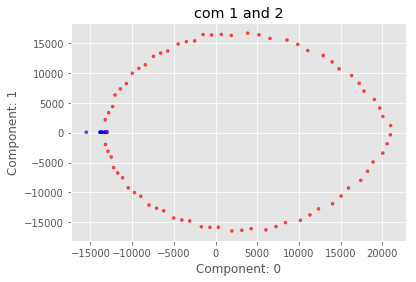

In [142]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
#    for i in range(num_to_plot):
#        img_num = int(random.random() * num_images)
#        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
#        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
#        img = df.iloc[img_num,:].reshape(144, 192)
#        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7,c=colors)
    
Plot2D(S, 'com 1 and 2', x=0, y=1, num_to_plot=40)
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

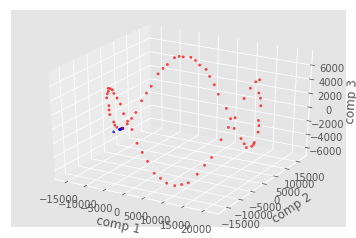

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')

ax.scatter(S[:,0],S[:,1],S[:,2], marker='.',alpha=0.7, c=colors)
plt.show()